# What is Portfolio Optimization and Why Should You have It?
Portfolio optimization is the process of strategically grouping investments in a way that maximizes returns while minimizing risks. Instead of randomly selecting assets, it uses mathematical and statistical methods to find the best mix of investments that align with your financial goals.

## Why Should You Use Portfolio Optimization?
- Balancing Risk and Reward: It helps you find the ideal tradeoff between earning more and avoiding losses. Example: If you want steady income, it might suggest adding bonds. If you want growth, it might recommend stocks.

- Diversification: Optimized portfolios spread risk by including assets that behave differently, reducing the chance of large losses.

- Data-Driven Decisions: Instead of guessing, you use data (like returns, risks, and correlations) to make smarter investment choices.

- Customizable to Goals: Whether you’re saving for retirement or buying a house, portfolio optimization adjusts to your time horizon and risk tolerance.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import quantstats as qs
from datetime import datetime
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier



In [2]:
#Downloading 50 sample stocks from Yahoo Finance
import yfinance as yf
import pandas as pd

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2025-01-31'

# List of 50 popular stocks
stock_tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BRK-B", "JPM",
    "V", "MA", "PYPL", "DIS", "ADBE", "INTC", "AMD", "IBM", "CSCO", "ORCL",
    "PFE", "MRNA", "JNJ", "UNH", "BABA", "KO", "PEP", "MCD", "NKE", "T",
    "XOM", "CVX", "BP", "BA", "CAT", "GE", "GS", "SPGI", "LMT", "MMM",
    "TSM", "SHOP", "SQ", "UBER", "LYFT", "ZM", "TWLO", "CRWD", "DOCU", "WMT"
]

# Download the stock data
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)
stock_data = stock_data[[col for col in stock_data.columns if 'Close' in col]]







[*********************100%***********************]  50 of 50 completed


In [3]:
stock_data.head()

Price           Close                                                \
Ticker           AAPL        ADBE        AMD       AMZN          BA   
Date                                                                  
2020-01-02  72.716072  334.429993  49.099998  94.900497  331.348572   
2020-01-03  72.009109  331.809998  48.599998  93.748497  330.791901   
2020-01-06  72.582893  333.709991  48.389999  95.143997  331.766083   
2020-01-07  72.241539  333.390015  48.250000  95.343002  335.285156   
2020-01-08  73.403648  337.869995  47.830002  94.598503  329.410095   

Price                                                                 ...  \
Ticker            BABA         BP       BRK-B         CAT       CRWD  ...   
Date                                                                  ...   
2020-01-02  212.242126  29.149960  228.389999  134.388840  49.439999  ...   
2020-01-03  209.567017  29.677319  226.179993  132.522934  50.750000  ...   
2020-01-06  209.219345  30.456886  226.990005  132.433624  55.110001  ...   
2020-01-07  210.175446  30.135887  225.919998  130.683838  54.750000  ...   
2020-01-08  210.532761  29.677319  225.990005  131.844421  55.660000  ...   

Price                                                               \
Ticker              T       TSLA        TSM        TWLO       UBER   
Date                                                                 
2020-01-02  19.815224  28.684000  54.504318  103.150002  30.990000   
2020-01-03  19.917204  29.534000  52.706875  103.519997  31.370001   
2020-01-06  19.937601  30.102667  52.098652  107.459999  31.580000   
2020-01-07  20.014086  31.270666  52.942917  108.059998  32.810001   
2020-01-08  20.075274  32.809334  53.333260  109.389999  33.930000   

Price                                                                
Ticker             UNH           V        WMT        XOM         ZM  
Date                                                                 
2020-01-02  271.775085  184.177414  36.782574  55.631180  68.720001  
2020-01-03  269.024841  182.712692  36.457863  55.183918  67.279999  
2020-01-06  270.892426  182.317535  36.383640  55.607643  70.320000  
2020-01-07  269.257111  181.835678  36.046558  55.152546  71.900002  
2020-01-08  274.934174  184.948318  35.922852  54.320831  72.550003  

[5 rows x 50 columns]

In [4]:
# Select only 'Close' prices and drop the 'Price' level
data = stock_data.xs('Close', level='Price', axis=1)

# Remove the 'Ticker' name from columns
data.columns.name = None  

In [5]:
data.head()

,AAPL,ADBE,AMD,AMZN,BA,BABA,BP,BRK-B,CAT,CRWD,...,T,TSLA,TSM,TWLO,UBER,UNH,V,WMT,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.716072,334.429993,49.099998,94.900497,331.348572,212.242126,29.149960,228.389999,134.388840,49.439999,...,19.815224,28.684000,54.504318,103.150002,30.990000,271.775085,184.177414,36.782574,55.631180,68.720001
2020-01-03,72.009109,331.809998,48.599998,93.748497,330.791901,209.567017,29.677319,226.179993,132.522934,50.750000,...,19.917204,29.534000,52.706875,103.519997,31.370001,269.024841,182.712692,36.457863,55.183918,67.279999
2020-01-06,72.582893,333.709991,48.389999,95.143997,331.766083,209.219345,30.456886,226.990005,132.433624,55.110001,...,19.937601,30.102667,52.098652,107.459999,31.580000,270.892426,182.317535,36.383640,55.607643,70.320000
2020-01-07,72.241539,333.390015,48.250000,95.343002,335.285156,210.175446,30.135887,225.919998,130.683838,54.750000,...,20.014086,31.270666,52.942917,108.059998,32.810001,269.257111,181.835678,36.046558,55.152546,71.900002
2020-01-08,73.403648,337.869995,47.830002,94.598503,329.410095,210.532761,29.677319,225.990005,131.844421,55.660000,...,20.075274,32.809334,53.333260,109.389999,33.930000,274.934174,184.948318,35.922852,54.320831,72.550003


In [6]:
data.isnull().sum()

AAPL     0
ADBE     0
AMD      0
AMZN     0
BA       0
BABA     0
BP       0
BRK-B    0
CAT      0
CRWD     0
CSCO     0
CVX      0
DIS      0
DOCU     0
GE       0
GOOGL    0
GS       0
IBM      0
INTC     0
JNJ      0
JPM      0
KO       0
LMT      0
LYFT     0
MA       0
MCD      0
META     0
MMM      0
MRNA     0
MSFT     0
NFLX     0
NKE      0
NVDA     0
ORCL     0
PEP      0
PFE      0
PYPL     0
SHOP     0
SPGI     0
SQ       0
T        0
TSLA     0
TSM      0
TWLO     0
UBER     0
UNH      0
V        0
WMT      0
XOM      0
ZM       0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

- Our data has no missing values

## data visualization

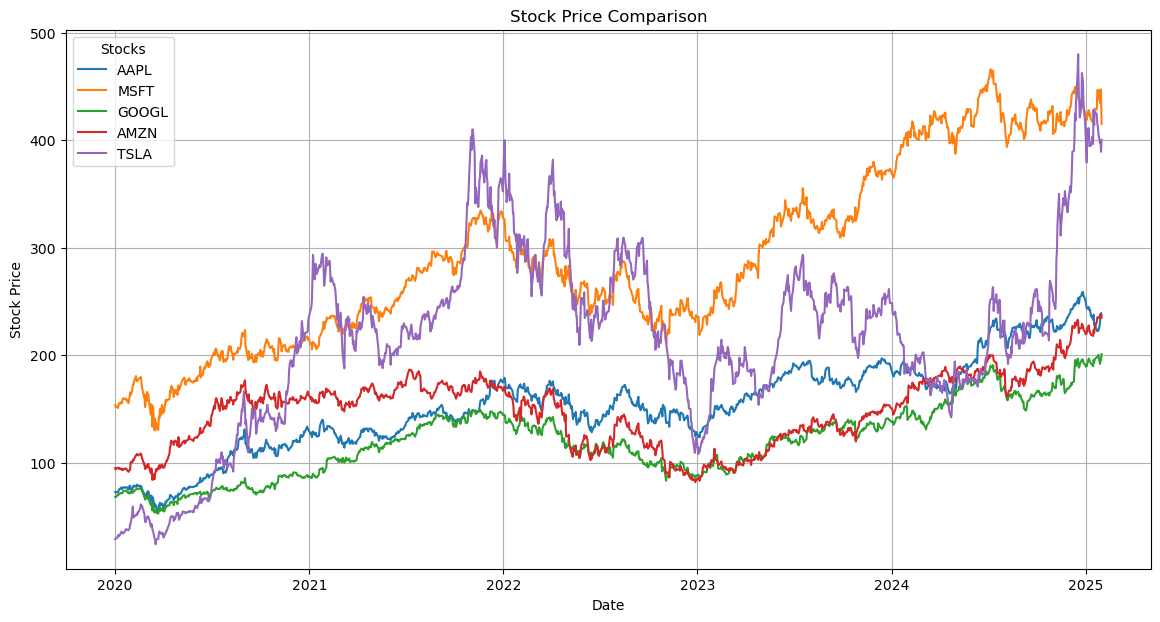

In [8]:
## plotting sample stocks 

# Reset the index to use Date as a column and modify the original DataFrame
data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sample 5 stocks
sample_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Create a single plot for all stocks
plt.figure(figsize=(14, 7))

for stock in sample_stocks:
    sns.lineplot(x='Date', y=stock, data=data, label=stock)

# Add title and labels
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend(title='Stocks')  # Add a legend to distinguish the stocks
plt.show()

## Optimizing Portfolio using the Markowitz Mean-Variance Optimization Model

We are going to use PyPortfolioOpt which makes our computation easier.

- There are two key requirements for mean-variance optimization:

1) Expected returns for each of the assets in the portfolio.

2) A risk model that quantifies the level of risk in each asset.The most commonly used risk model is the covariance matrix, which describes the volatilities of assets and the degree to which they are co-dependent.

In [ ]:
# we are going to build a portfolio with these 5 stocks
sample_data = data[['Date'] + sample_stocks].copy()

# Set the 'Date' column as the index
sample_data.set_index('Date', inplace=True)

sample_data.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2020-01-02,72.716072,153.630676,68.186813,94.900497,28.684000
2020-01-03,72.009109,151.717743,67.830116,93.748497,29.534000
2020-01-06,72.582893,152.109879,69.638054,95.143997,30.102667
2020-01-07,72.241539,150.722992,69.503548,95.343002,31.270666
2020-01-08,73.403648,153.123749,69.998253,94.598503,32.809334


In [24]:
# Calculate daily returns
daily_returns = sample_data.pct_change().dropna()

- The pypfopt library will help as calculate the mean and covariance instead of doing it manually 

In [15]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
Mean = expected_returns.mean_historical_return(sample_data) #expected returns
covariance = risk_models.sample_cov(sample_data) #Covariance matrix

In [17]:
Mean

AAPL     0.263152
MSFT     0.216829
GOOGL    0.237845
AMZN     0.195751
TSLA     0.682961
dtype: float64

In [18]:
covariance

,AAPL,MSFT,GOOGL,AMZN,TSLA
AAPL,0.100297,0.071747,0.065925,0.066814,0.102052
MSFT,0.071747,0.093301,0.073113,0.074002,0.090654
GOOGL,0.065925,0.073113,0.105141,0.074960,0.087077
AMZN,0.066814,0.074002,0.074960,0.128146,0.103872
TSLA,0.102052,0.090654,0.087077,0.103872,0.449383


- Next we calculate the weights of the stocks using the  EfficientFrontier
- The PyPortfolioOpt library provides the EfficientFrontier class which wiil be used to determine the weights

In [19]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(Mean,covariance) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('AAPL', 0.35217),
             ('MSFT', 0.0),
             ('GOOGL', 0.23761),
             ('AMZN', 0.0),
             ('TSLA', 0.41021)])

- Microsoft and amazon we not awarded any weights 
- Tesla received the highest 41% followed by Apple 35% and Google 24%

In [ ]:
# Convert clean_weights to a pandas Series for easier calculations
weights_series = pd.Series(clean_weights)

# Calculate daily portfolio returns
portfolio_daily_returns = daily_returns.dot(weights_series)

print('Portfolio Daily Returns')
print(portfolio_daily_returns)


Portfolio Daily Returns
Date
2020-01-03    0.007489
2020-01-06    0.017038
2020-01-07    0.013801
2020-01-08    0.027541
2020-01-09    0.000973
dtype: float64


In [31]:
# downloading the S&P 500 to act as the bench mark for our portfolio
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2020-01-03':'2025-01-30']
sp500

Date
2020-01-03   -0.007060
2020-01-06    0.003533
2020-01-07   -0.002803
2020-01-08    0.004902
2020-01-09    0.006655
                ...   
2025-01-24   -0.002855
2025-01-27   -0.014581
2025-01-28    0.009218
2025-01-29   -0.004679
2025-01-30    0.005275
Name: Close, Length: 1276, dtype: float64

In [35]:
#comparing the two portfolios
qs.reports.metrics(portfolio_daily_returns, benchmark=sp500)

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2020-01-03   2020-01-03
End Period          2025-01-30   2025-01-30
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   86.36%       629.25%
CAGR﹪              8.83%        31.0%

Sharpe              0.69         1.2
Prob. Sharpe Ratio  93.58%       99.64%
Sortino             0.96         1.77
Sortino/√2          0.68         1.25
Omega               1.23         1.23

Max Drawdown        -33.92%      -52.52%
Longest DD Days     745          911

Gain/Pain Ratio     0.14         0.23
Gain/Pain (1M)      0.77         1.41

Payoff Ratio        0.93         1.0
Profit Factor       1.14         1.23
Common Sense Ratio  1.12         1.33
CPC Index           0.57         0.66
Tail Ratio          0.99         1.08
Outlier Win Ratio   5.41         2.57
Outlier Loss Ratio  5.46         2.81

MTD                 3.22%        -0.51%
3M           

#### Key takeaways
- Cumulative Return: 
The optimized portfolio has generated a significantly higher cumulative return of 629.25% compared to 86.36% for the benchmark portfolio. This means that the an investment in the optimized portfolio would have provided higher earnings for investors compared to the sp500 portfolio.
- CAGR: 
The compounded annual growth rate (CAGR) of the optimized portfolio is higher at  31.0% compared to 8.83% for the benchmark portfolio. This suggests that the optimized portfolio has generated a higher rate of return per year over the entire investment period.
- Sharpe Ratio: 
The optimized portfolio has a  higher Sharpe ratio of 1.2 compared to 0.69 for the benchmark portfolio, indicating that it has generated a better risk-adjusted return.
- The maximum drawdown for the optimized portfolio is higher at -52.52% compared to -33.92% for the original portfolio. This means that the optimized portfolio experienced higher losses during the worst period of performance.But it also had a higher Recovery Factor 4.52 compared to 2.17 